In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import confusion_matrix, accuracy_score

In [8]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
# checking for NAN values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

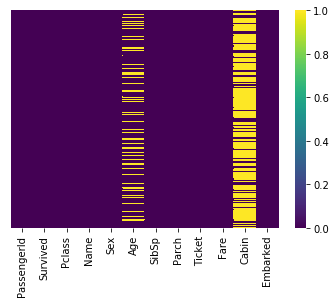

In [14]:
# Visualisation of NaN values
sns.heatmap(df.isnull(), yticklabels=False, cmap='viridis')

## Visualization of more data 

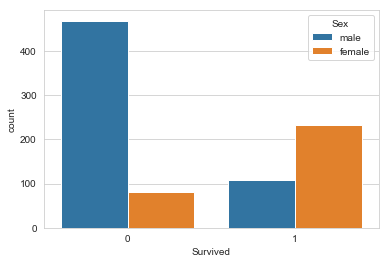

In [49]:
# Count of Survivors & Non-survivors
sns.set_style('whitegrid')
sns.countplot('Survived', data=df, hue='Sex')

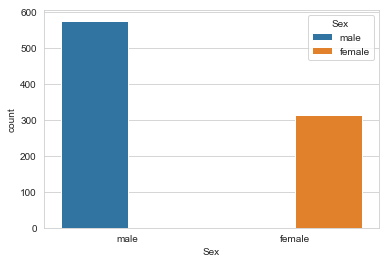

In [48]:
# Count of Sex of Passengers
sns.set_style('whitegrid')
sns.countplot('Sex', data=df, hue='Sex')

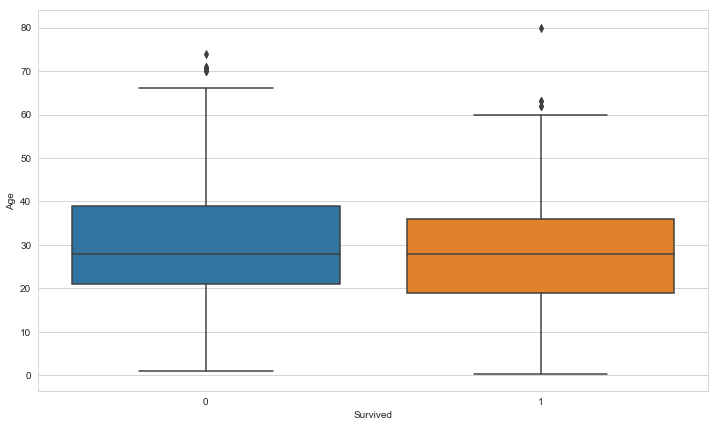

In [41]:
# Relationship b/w Age and survived people
plt.figure(figsize=(12,7))
sns.set_style('whitegrid')
sns.boxplot(x='Survived', y='Age', data=df)

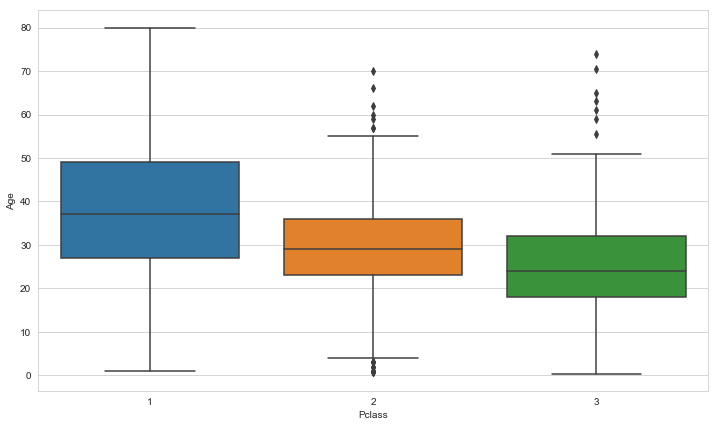

In [47]:
# Relationship b/w Pclass and Age
plt.figure(figsize=(12,7))
sns.set_style('whitegrid')
sns.boxplot(y='Age', x='Pclass', data=df)

## Cleaning the data

In [57]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
       
    else:
        return Age

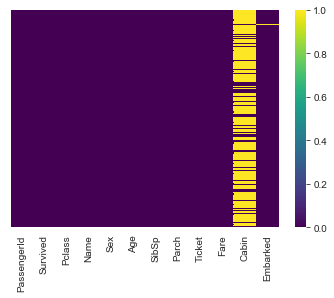

In [59]:
df['Age'] = df[['Age', 'Pclass']].apply(impute_age,axis=1)
sns.heatmap(df.isnull(), yticklabels=False, cmap='viridis')

In [102]:
df1 = df.copy()

In [149]:
df3 = df.copy()

In [150]:
dropped_features = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Sex', 'Embarked']

df3.drop(columns=dropped_features, inplace=True)

df3.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


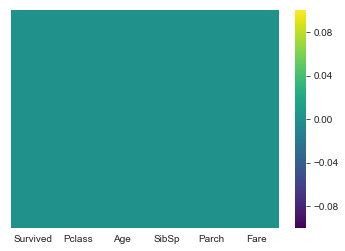

In [161]:
# ALL DATA IS CLEANED AND THERE IS NO NaN VALUES
sns.heatmap(df3.isnull(),  yticklabels=False, cmap = 'viridis')

In [151]:
df3.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [152]:
df3.drop('Survived', axis=1).head()

,Pclass,Age,SibSp,Parch,Fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,3,35.0,0,0,8.0500


In [109]:
df2['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [153]:
# Dividing the Dataset into train and test
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(df3.drop('Survived', axis=1), df3['Survived'], test_size=0.20)


# Predictions

## Logistic Regression

In [162]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

pred = lr.predict(X_test)
accuracy = confusion_matrix(y_test,pred)
accuracy = round(accuracy_score(y_test, pred),2)
print('Model Accuracy: ', accuracy*100)
confusion_matrix(y_test, pred)

Model Accuracy:  73.0


C:\Users\Aman\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[101,  15],
       [ 34,  29]], dtype=int64)

## Random Forest Classifier

In [163]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='entropy', max_depth=3)
rf.fit(X_train, y_train)
pred = rf.predict(X_test)
accuracy = round(accuracy_score(y_test, pred),2)
print('Model Accuracy :', accuracy*100)
confusion_matrix(y_test, pred)

Model Accuracy : 75.0


C:\Users\Aman\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([[101,  15],
       [ 29,  34]], dtype=int64)

## Decision Tree

In [164]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='entropy', max_depth=3)
dt.fit(X_train, y_train)
pred = dt.predict(X_test)
accuracy = round(accuracy_score(y_test, pred),2)
print('Model Accuracy :', accuracy*100)

confusion_matrix(y_test, pred)

Model Accuracy : 69.0


array([[107,   9],
       [ 46,  17]], dtype=int64)